In [10]:
import pandas as pd
import numpy as np

In [3]:
import os

ROOT = os.getcwd()
WORK_DIR = os.path.dirname(ROOT)

In [55]:
from sklearn.metrics import accuracy_score

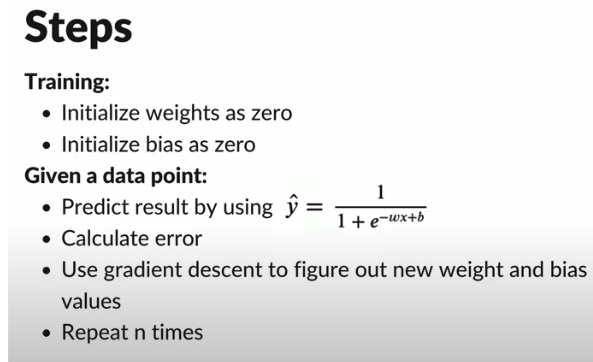

In [4]:
from PIL import Image

Image.open(os.path.join(WORK_DIR, 'images/training.png'))

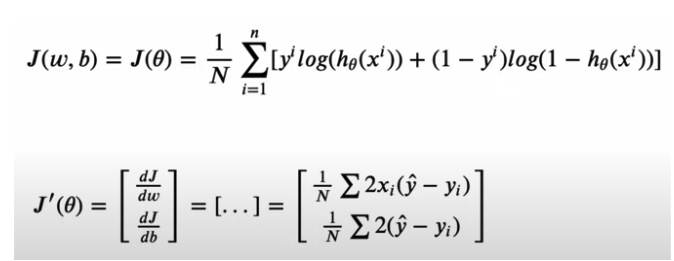

In [5]:
Image.open(os.path.join(WORK_DIR, 'images/loss.png'))

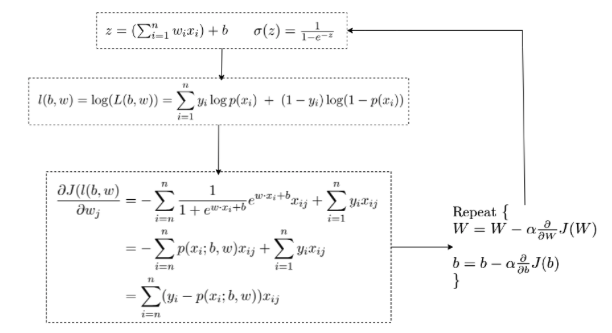

In [7]:
Image.open(os.path.join(WORK_DIR, 'images/pipeline.png'))

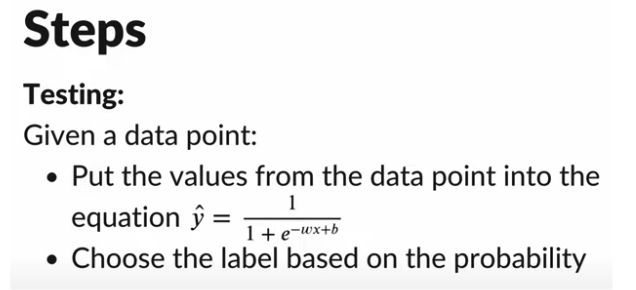

In [8]:
Image.open(os.path.join(WORK_DIR, 'images/predict.png'))

How to multiply shape between X and y

X -> (n, m) 2D
y -> (n, ) 1D

==> X.T * y [ (m, n) * (n, ) ]

In [74]:


from typing import List

class LogisticRegression:
    
    def __init__(self, lr, n_iters) -> None:
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.losses = []
        self.accs = []
        
    @staticmethod
    def sigmoid(X):
        return 1 / (1 + np.exp(-X))
    
    def fit(self, X, y) -> None:
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for i in range(self.n_iters):
            # Predict result by using y = 1 / (1 + exp(-wx+b))
            linear = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(linear)

            # Calculate loss
            
            loss = 1 / (n_samples) * sum((y * np.log(predictions) + (1 - y) * np.log(1 - predictions)))
            self.losses.append(abs(loss))
            
            dw = (1 / n_samples) * 2  * np.dot(X.T, (predictions - y))
            db = (1 / n_samples) * 2  * sum(predictions - y)
         
            # Update weights and bias
            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db
            
            print(f"Iteration {i}: Loss={abs(loss)}")
            
            
    def predict(self, X) -> List[int]:
        linear = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(linear)
        
        class_pred = [0 if prediction<=0.5 else 1 for prediction in predictions]
        
        return class_pred

In [11]:
from sklearn import datasets

data = datasets.load_iris()

target = pd.DataFrame({'Label': data.target.tolist()}, index=range(len(data.target.tolist())))
target.replace({0: 'Iris-Setosa', 1: 'Iris-Versicolour', 2: 'Iris-Virginica'}, inplace=True)

features = pd.DataFrame({'sepal_length': data.data[:,0].tolist(), 'sepal_width': data.data[:,1].tolist(),
                         'petal_length': data.data[:,2].tolist(), 'petal_width': data.data[:,-1].tolist()}, index=range(len(data.data[:, 0].tolist())))

df = pd.concat([features, target], axis=1)

In [12]:
from sklearn.model_selection import train_test_split

X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y= df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
def data_preprocessing(X, y):
    df = pd.concat([X, y], axis=1)
    df = df[(df.Label == 'Iris-Setosa') | (df.Label == 'Iris-Versicolour')]
    df.replace({'Iris-Setosa': 0, 'Iris-Versicolour': 1}, inplace=True)
    return df

In [18]:
df_train = data_preprocessing(X_train, y_train)
df_test = data_preprocessing(X_test, y_test)

In [21]:
X_train = df_train.iloc[:, :-1]
y_train = df_train.Label

X_test = df_test.iloc[:, :-1]
y_test = df_test.Label

In [75]:
logistic_regression = LogisticRegression(lr=1e-2, n_iters=1000)
logistic_regression.fit(X_train, y_train)

Iteration 0: Loss=0.6931471805599455
Iteration 1: Loss=0.6769142455658013
Iteration 2: Loss=0.6642732470873287
Iteration 3: Loss=0.653697356047678
Iteration 4: Loss=0.6443355141949828
Iteration 5: Loss=0.6357136328063476
Iteration 6: Loss=0.6275664865806262
Iteration 7: Loss=0.6197446547059159
Iteration 8: Loss=0.6121631670673898
Iteration 9: Loss=0.6047730929050118
Iteration 10: Loss=0.597545748960416
Iteration 11: Loss=0.5904638772738807
Iteration 12: Loss=0.5835166932781672
Iteration 13: Loss=0.5766970949465485
Iteration 14: Loss=0.5700000846314219
Iteration 15: Loss=0.5634218743172386
Iteration 16: Loss=0.5569593773670625
Iteration 17: Loss=0.5506099194575701
Iteration 18: Loss=0.5443710740880774
Iteration 19: Loss=0.5382405689994479
Iteration 20: Loss=0.5322162329938711
Iteration 21: Loss=0.5262959657791354
Iteration 22: Loss=0.5204777209274919
Iteration 23: Loss=0.5147594962924378
Iteration 24: Loss=0.5091393286532652
Iteration 25: Loss=0.5036152907431478
Iteration 26: Loss=0.498

In [58]:
predict = logistic_regression.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(predict, y_test)

In [49]:
acc

1.0

In [78]:
loss = pd.DataFrame({'Index': range(len(logistic_regression.losses)), 'Loss': logistic_regression.losses}, index=range(len(logistic_regression.losses)))

<Axes: xlabel='Index', ylabel='Loss'>

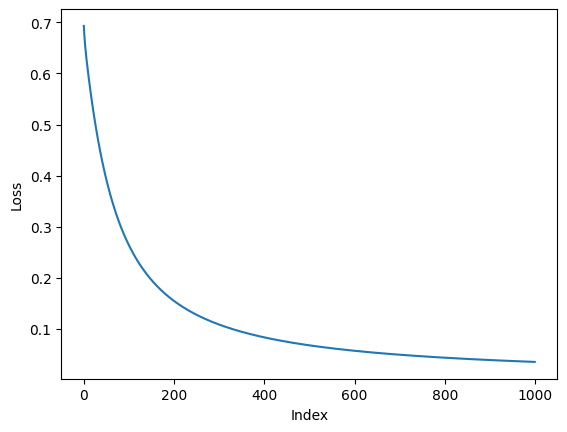

In [80]:
import seaborn as sns


sns.lineplot(data=loss, x="Index", y="Loss", orient="y")